# Snow disappearance date figures 
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

In [2]:
sns.set_style("whitegrid")

Open the cleaned pickle files

In [3]:
#import csv file for Site Openness and Snow Disappearance
results = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\GapFraction_SDD.csv")

#make sure all dates are type datetime
results['SDD1'] = pd.to_datetime(results['SDD1'])
results['SDD2'] = pd.to_datetime(results['SDD2'])
results['SDD3'] = pd.to_datetime(results['SDD3'])
results['SDD4'] = pd.to_datetime(results['SDD4'])
results['SDD5'] = pd.to_datetime(results['SDD5'])
results['SDD6'] = pd.to_datetime(results['SDD6'])
results['SDD7'] = pd.to_datetime(results['SDD7'])
results['SDD8'] = pd.to_datetime(results['SDD8'])
results['SDD9'] = pd.to_datetime(results['SDD9'])

#create variables containing results for north and south respectively
CNresults = results.loc[results['Site'] == "CN"]
CSresults = results.loc[results['Site'] == "CS"]

In [4]:
# # now the SDD files too
# SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
# SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

(notes below from John)
### Note for the following plots:
During the early season in November, snow sometimes accumulated and then melted out,\
resulting in snow disapprance dates very early in the season.\
I chose to not include these early season melt outs,\
and as a result, I only used snow disappearance dates after December 1st.

To explain how I made this adjustment, I first need to explain why there are columns in the master csv file for SDD1, SDD2, SDD3, etc.\
Snow disapperance dates are characterized a day with no snow present, while snow was present the previous day.\
For most poles and temperature stakes, this occured multiple times.\
SDD1 corresponds to the first snow disappreance date, SDD2 corresponds to the second, etc.

To exclude November snow disappearance dates for the plots below, I used the first SDD for each pole/stake after December 1st.\
To find this date, I created three variables, CNresults_SDD1, CNresults_SDD2, and CNresults_SDD3 (I created the same variables for CS as well).\ CNresults_SDD1 includes the value from the SDD1 column if it is after Dec 1st.\
CNresults_SDD2 includes dates from the SDD2 column if the SDD1 column is before Dec 1 and the SDD2 columns is after Dec 1.\
CNresults_SDD3 includes dates from the SDD3 column if both the SDD1 and SDD2 columns are before Dec 1.\
No site had a more than two snow disappearance dates in November, so I did not need to continue this pattern.

I then plotted all three variables to grab the snow disapprance dates after Dec 1, and their corresponding Site Openness Fraction.

In [5]:
CNresults_SDD3 = CNresults.loc[(CNresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CNresults['SDD2'] <= datetime.datetime(2022,12,1))]
CNresults_SDD2 = CNresults.loc[(CNresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CNresults['SDD2'] >= datetime.datetime(2022,12,1))]
CNresults_SDD1 = CNresults.loc[(CNresults['SDD1'] >= datetime.datetime(2022,12,1))]

CSresults_SDD3 = CSresults.loc[(CSresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CSresults['SDD2'] <= datetime.datetime(2022,12,1))]
CSresults_SDD2 = CSresults.loc[(CSresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CSresults['SDD2'] >= datetime.datetime(2022,12,1))]
CSresults_SDD1 = CSresults.loc[(CSresults['SDD1'] >= datetime.datetime(2022,12,1))]

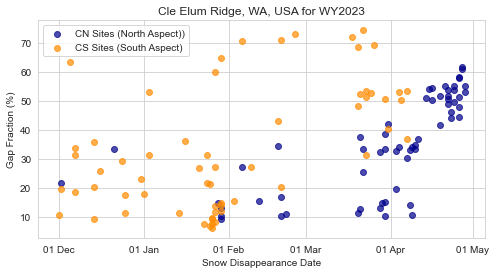

In [51]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(CNresults_SDD1['SDD1'], CNresults_SDD1['SiteOpennessAdjusted'], color = 'darkblue', alpha = 0.7, label = "CN Sites (North Aspect))")
plt.scatter(CNresults_SDD2['SDD2'], CNresults_SDD2['SiteOpennessAdjusted'], color = 'darkblue', alpha = 0.7)
plt.scatter(CNresults_SDD3['SDD3'], CNresults_SDD3['SiteOpennessAdjusted'], color = 'darkblue', alpha = 0.7)

plt.scatter(CSresults_SDD1['SDD1'], CSresults_SDD1['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7, label = "CS Sites (South Aspect)")
plt.scatter(CSresults_SDD2['SDD2'], CSresults_SDD2['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7)
plt.scatter(CSresults_SDD3['SDD3'], CSresults_SDD3['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7)

ax.xaxis.set_major_formatter(dates.DateFormatter('%d %b'))
plt.ylabel("Gap Fraction (%)")
plt.xlabel("Snow Disappearance Date")
plt.title("Cle Elum Ridge, WA, USA for WY2023")
plt.legend(loc = "upper left")

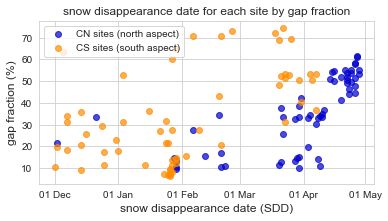

In [19]:
fig, ax = plt.subplots(figsize = (6,3))

plt.scatter(CNresults_SDD1['SDD1'], CNresults_SDD1['SiteOpennessAdjusted'], color = 'mediumblue', alpha = 0.7, label = "CN sites (north aspect)")
plt.scatter(CNresults_SDD2['SDD2'], CNresults_SDD2['SiteOpennessAdjusted'], color = 'mediumblue', alpha = 0.7)
plt.scatter(CNresults_SDD3['SDD3'], CNresults_SDD3['SiteOpennessAdjusted'], color = 'mediumblue', alpha = 0.7)

plt.scatter(CSresults_SDD1['SDD1'], CSresults_SDD1['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7, label = "CS sites (south aspect)")
plt.scatter(CSresults_SDD2['SDD2'], CSresults_SDD2['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7)
plt.scatter(CSresults_SDD3['SDD3'], CSresults_SDD3['SiteOpennessAdjusted'], color = 'darkorange', alpha = 0.7)

ax.xaxis.set_major_formatter(dates.DateFormatter('%d %b'))
plt.ylabel("gap fraction (%)", fontsize=12)
plt.xlabel("snow disappearance date (SDD)", fontsize=12)
# plt.title("Cle Elum Ridge, WA, USA for WY2023")
plt.title("snow disappearance date for each site by gap fraction", fontsize=12)

plt.legend(loc = "upper left")

Text(0.5, 1.0, 'Cle Elum Ridge, WA, USA for WY2023')

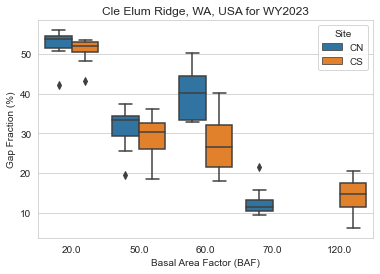

In [42]:
#simple boxplot and swarmplot to compare basal area factor to site opennes (%)
sns.boxplot(x = results['BAF'],y = results['SiteOpennessAdjusted'], hue=results['Site'])

plt.xlabel("Basal Area Factor (BAF)")
plt.ylabel("Gap Fraction (%)")
plt.title("Cle Elum Ridge, WA, USA for WY2023")

Text(0.5, 1.0, 'Cle Elum Ridge, WA, USA for WY2023')

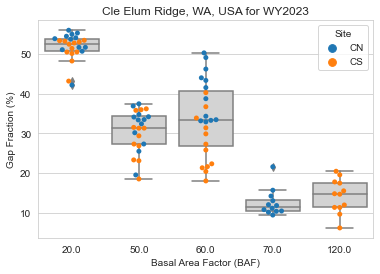

In [48]:
#simple boxplot and swarmplot to compare basal area factor to site opennes (%)
sns.boxplot(x = results['BAF'],y = results['SiteOpennessAdjusted'], color='lightgrey')
sns.swarmplot(x = results['BAF'],y = results['SiteOpennessAdjusted'], hue=results['Site'])

plt.xlabel("Basal Area Factor (BAF)")
plt.ylabel("Gap Fraction (%)")
plt.title("Cle Elum Ridge, WA, USA for WY2023")